# Clustering Crypto

In [79]:
# Initial imports
import requests
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Fetching Cryptocurrency Data

In [80]:
# Use the following endpoint to fetch json data
url = "https://min-api.cryptocompare.com/data/all/coinlist"

In [81]:
# Create a DataFrame 
# HINT: You will need to use the 'Data' key from the json response, then transpose the DataFrame.

In [82]:
# Alternatively, use the provided csv file:
file_path = Path("Resources/crypto_data.csv")

crypto_df = pd.read_csv(file_path, index_col = 0)
crypto_df.head()

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


### Data Preprocessing

In [83]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [84]:
# Keep only cryptocurrencies that are trading
crypto_df = crypto_df[crypto_df["IsTrading"] == True]
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [85]:
# Keep only cryptocurrencies with a working algorithm
crypto_df = crypto_df[crypto_df["TotalCoinsMined"] >= 0]
crypto_df

In [86]:
# Remove the "IsTrading" column
crypto_df.drop(columns = ["IsTrading"], inplace = True)

C:\Users\ryanc\anaconda3\envs\pyvizenv2\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [87]:
# Remove rows with at least 1 null value
crypto_df.dropna()

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [88]:
# Remove rows with cryptocurrencies having no coins mined
crypto_df = crypto_df[crypto_df["TotalCoinsMined"] >= 0]
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [89]:
# Drop rows where there are 'N/A' text values
crypto_df = crypto_df[crypto_df != "N/A"]
crypto_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [90]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df
coin_name_df = pd.DataFrame(crypto_df["CoinName"])
coin_name_df

,CoinName
42,42 Coin
404,404Coin
808,808
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
LTC,Litecoin
DASH,Dash
XMR,Monero
ETC,Ethereum Classic


In [91]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
crypto_df.drop(columns = ["CoinName"], inplace = True)
crypto_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
808,SHA-256,PoW/PoS,0.000000e+00,0
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000


In [92]:
# Create dummy variables for text features
X = pd.get_dummies(crypto_df, columns=["Algorithm", "ProofType"])
X.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
808,0.000000e+00,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
# Standardize data
scaler = StandardScaler()

In [94]:
scaler.fit(X)

StandardScaler()

In [95]:
scaled_data = scaler.transform(X)

### Reducing Dimensions Using PCA

In [96]:
# Use PCA to reduce dimensions to 3 principal components
pca = PCA(n_components = 3)

In [97]:
# Create a DataFrame with the principal components data
crypto_pca = pca.fit_transform(scaled_data)
pcs_df = pd.DataFrame(data = crypto_pca, index = crypto_df.index, columns = ["PC 1", "PC 2", "PC 3"])
pcs_df.head()

,PC 1,PC 2,PC 3
42,-0.191278,1.290058,-0.437354
404,-0.176696,1.287913,-0.438070
808,-0.102836,0.755268,-0.247595
1337,0.364500,1.800319,-0.457441
BTC,-0.243226,-1.472955,0.139238


### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

In [98]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters = i, random_state = 0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
elbow_data_df = pd.DataFrame(elbow_data)
elbow_data_df.hvplot.line(x = "k", y = "inertia", xticks = k)

:Curve   [k]   (inertia)

Running K-Means with `k=<your best value for k here>`

In [99]:
# Initialize the K-Means model
model = KMeans(n_clusters = 5, random_state = 0)
# Fit the model
model.fit(pcs_df)
# Predict clusters
predictions = model.predict(pcs_df)
# Create a new DataFrame including predicted clusters and cryptocurrencies features
cluster_df = pd.merge(crypto_df, pcs_df, right_index=True, left_index=True)
cluster_df["Class"] = model.labels_
clustered_df = pd.merge(coin_name_df, cluster_df, right_index=True, left_index=True)
clustered_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,Class
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42,-0.191278,1.290058,-0.437354,0
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.176696,1.287913,-0.438070,0
808,808,SHA-256,PoW/PoS,0.000000e+00,0,-0.102836,0.755268,-0.247595,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359,0.364500,1.800319,-0.457441,0
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000,-0.243226,-1.472955,0.139238,1
ETH,Ethereum,Ethash,PoW,1.076842e+08,0,-0.329100,-2.087469,0.245442,1
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000,-0.331045,-0.938256,-0.050552,1
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000,-0.135651,1.394135,-0.389896,0
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0,-0.337536,-2.175509,0.200416,1
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000,-0.329022,-2.087481,0.245438,1


### Visualizing Results

#### 3D-Scatter with Clusters

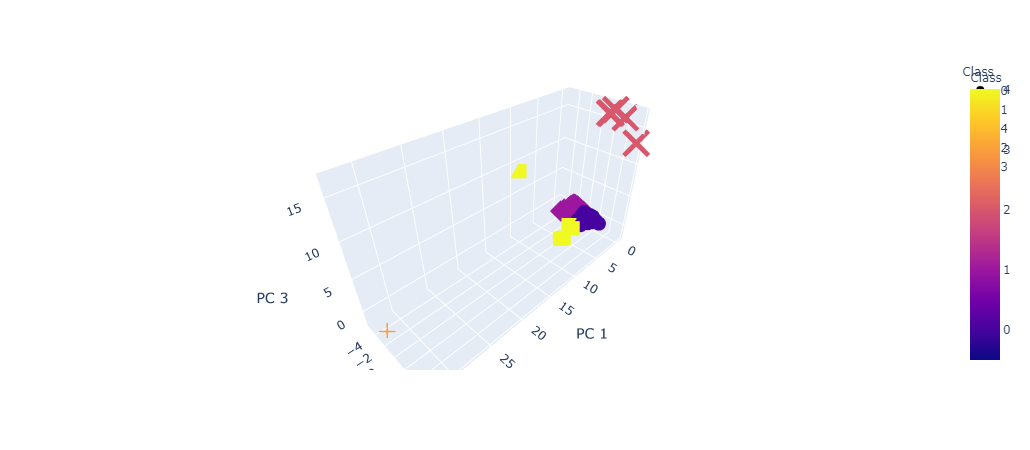

In [100]:
# Create a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(clustered_df, x = "PC 1", y = "PC 2", z = "PC 3", color = "Class", symbol = "Class", hover_name = "CoinName", hover_data = ["Algorithm"])
fig.show()

#### Table of Tradable Cryptocurrencies

In [101]:
# Table with tradable cryptos
clustered_df.hvplot.table(columns = ["CoinName", "Algorithm", "ProofType", "TotalCoinSupply", "TotalCoinsMined", "Class"])

:Table   [CoinName,Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined,Class]

In [102]:
# Print the total number of tradable cryptocurrencies
print(len(clustered_df))

684


#### Scatter Plot with Tradable Cryptocurrencies

In [103]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
clustered_df.hvplot.scatter(x = "TotalCoinsMined", y = "TotalCoinSupply", hover_cols = ["CoinName"])

:Scatter   [TotalCoinsMined]   (TotalCoinSupply,CoinName)